### Fraud Detection Model

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv(r"C:\Users\Neha Mathew\OneDrive\Documents\Python Scripts\Data\Fraud_PredictionModel\Fraud_data.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df2=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [8]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [10]:
df2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
dummies=pd.get_dummies(df2['type']).drop(['CASH_IN'],axis=1)

In [17]:
dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [25]:
df3=pd.concat([df2,dummies],axis=1).drop(['type'],axis=1)

In [26]:
df3

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [27]:
X_train,X_test,y_train,y_test= train_test_split(df3.drop(['isFraud'],axis=1),df3.isFraud,test_size=0.2,random_state=False)

In [28]:
print(df3.shape,X_train.shape,X_test.shape)

(6362620, 11) (5090096, 10) (1272524, 10)


In [29]:
model=LogisticRegression()

In [30]:
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
predict=model.predict(X_test)

In [37]:
model.score(X_test,y_test)

0.998257007333457

In [38]:
df3['isFraud'].unique()

array([0, 1], dtype=int64)

In [39]:
df3.groupby('isFraud').sum()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,
0,1545618400,1.132337e+12,5.292133e+12,5.439183e+12,6.998877e+12,7.783676e+12,2233384,41432,2151495,528812
1,3025783,1.205642e+10,1.354872e+10,1.580121e+09,4.469922e+09,1.051024e+10,4116,0,0,4097


In [40]:
 cm=confusion_matrix(y_test,predict)

In [41]:
cm

array([[1269630,    1253],
       [    965,     676]], dtype=int64)

([<matplotlib.axis.YTick at 0x2680c8ea6b0>,
 [Text(0, 0.5, 'No_Fraud'), Text(0, 1.5, 'Fraud')])

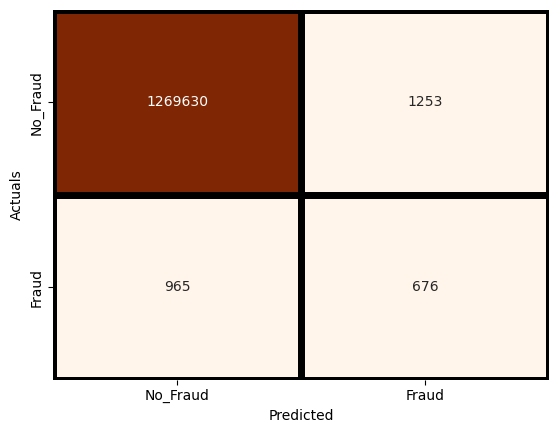

In [61]:
sns.heatmap(cm,cmap='Oranges',annot=True,fmt='d',cbar=False,linecolor='Black',linewidth=5)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.xticks(np.arange(2)+.5,['No_Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No_Fraud','Fraud'])

### Implementing Decision Tree Classifier into Fraud Detection Model

In [63]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [64]:
df.groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_IN,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284
CASH_OUT,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500
DEBIT,41432,41432,41432,41432,41432,41432,41432,41432,41432,41432
PAYMENT,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495
TRANSFER,532909,532909,532909,532909,532909,532909,532909,532909,532909,532909


In [66]:
 df.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [67]:
dffltr=df[df.type.isin(['CASH_OUT','TRANSFER'])]

In [68]:
 dffltr.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')

isFraud,0,1
type,,
CASH_OUT,2233384,4116
TRANSFER,528812,4097


In [70]:
dffltr

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [73]:
encoder=LabelEncoder()

In [74]:
dffltr['type_encoded']=encoder.fit_transform(dffltr['type'])

C:\Users\Neha Mathew\AppData\Local\Temp\ipykernel_476\499051797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffltr['type_encoded']=encoder.fit_transform(dffltr['type'])


In [75]:
 dffltr.pivot_table(values='amount',index='type_encoded',columns='isFraud',aggfunc='count')

isFraud,0,1
type_encoded,,
0,2233384,4116
1,528812,4097


In [78]:
df5=dffltr.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [80]:
df5.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [81]:
X_train,X_test,y_train,y_test= train_test_split(df5.drop(['isFraud'],axis=1),df5.isFraud,test_size=0.2,random_state=False)

In [82]:
LogReg=LogisticRegression()

In [83]:
LogReg.fit(X_train,y_train)

LogisticRegression()

In [87]:
predicted=LogReg.predict(X_test)

In [88]:
LogReg.score(X_test,y_test)

0.9974137402045185

In [89]:
cm=confusion_matrix(y_test,predicted)

In [90]:
cm

array([[551470,    976],
       [   457,   1179]], dtype=int64)

([<matplotlib.axis.YTick at 0x26802003c40>,
 [Text(0, 0.5, 'No_Fraud'), Text(0, 1.5, 'Fraud')])

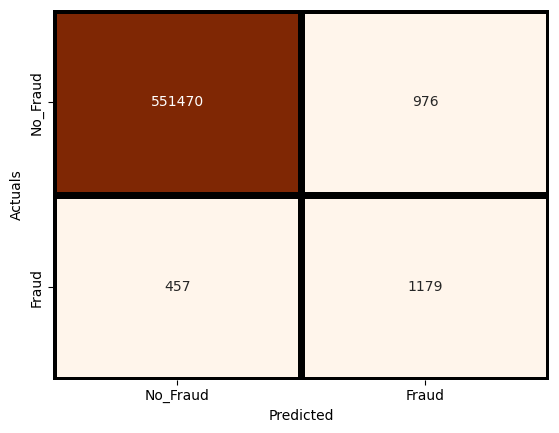

In [91]:
sns.heatmap(cm,cmap='Oranges',annot=True,fmt='d',cbar=False,linecolor='Black',linewidth=5)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.xticks(np.arange(2)+.5,['No_Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No_Fraud','Fraud'])

In [92]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.55      0.72      0.62      1636

    accuracy                           1.00    554082
   macro avg       0.77      0.86      0.81    554082
weighted avg       1.00      1.00      1.00    554082



In [96]:
dModel= DecisionTreeClassifier()

In [97]:
dModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
dPredicted=dModel.predict(X_test)

In [99]:
dPredicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
cm=confusion_matrix(y_test,dPredicted)

In [101]:
cm

array([[552308,    138],
       [   174,   1462]], dtype=int64)

([<matplotlib.axis.YTick at 0x26803b64ca0>,
 [Text(0, 0.5, 'No_Fraud'), Text(0, 1.5, 'Fraud')])

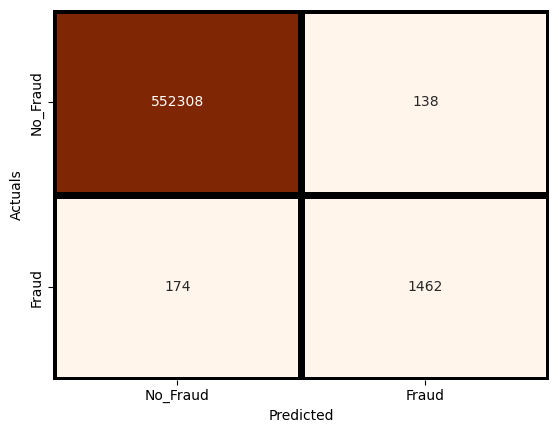

In [104]:
sns.heatmap(cm,cmap='Oranges',annot=True,fmt='d',cbar=False,linecolor='Black',linewidth=5)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.xticks(np.arange(2)+.5,['No_Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No_Fraud','Fraud'])

In [103]:
print(classification_report(y_test,dPredicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.91      0.89      0.90      1636

    accuracy                           1.00    554082
   macro avg       0.96      0.95      0.95    554082
weighted avg       1.00      1.00      1.00    554082

